# CÂU HỎI: ĐẶC ĐIỂM VỀ KHÔNG KHÍ TẠI SHILIN, ĐÀI LOAN TỪ GIAI ĐOẠN 2016-2024 CÓ TÍNH CHẤT, QUY LUẬT NHƯ THẾ NÀO ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn as sns
import matplotlib.cm as cm


In [2]:
data=pd.read_csv('../Datasets/air_quality_shilin.csv')

## BIỂU ĐỒ CỘT: TRUNG BÌNH CHỈ SỐ AIR QUALITY INDEX CỦA SHILIN, ĐÀI LOAN QUA TỪNG NĂM
1. **Các thuộc tính sử dụng**
- `date`: thời điểm ghi nhận số liệu.
- `aqui`: chỉ số chất lượng không khí, rủi ro sức khỏe cộng đồng càng cao khi chỉ số này càng lớn
2. **Loại biểu đồ**
**Biểu đồ đường**: biểu đồ này phù hợp cho việc nhóm các đối tượng liên quan khi cần thiết và mục tiêu quan trọng nhất là dùng để so sánh các đối tượng với nhau
3. **Ý nghĩa của biểu đồ**
- Tên của biểu đồ: Trung bình chỉ số AQI theo từng quý.
- Trục tung: Giá trị của chỉ số AQI trung bình trong một đơn vị thời gian, ở đây là 4 tháng(1 quý).
- Trục hoành: Các khoảng thời gian được xét bao gồm 8 năm và mỗi năm được chia thành 4 quý.
- Các cột nằm kề nhau là các quý thuộc cùng một năm.
- Các quý giống nhau thuộc các năm khác nhau đều sử dụng chung màu sắc.
4. **Nguyên nhân sử dụng**
Biểu đồ đường dễ trực quan được giá trị trung bình của chỉ số AQI, đồng thời việc nhóm các quý thuộc cùng một năm vào từng cụm riêng biệt vừa giúp so sánh các quý thuộc cùng một năm, cùng một quý qua các năm trở nên dễ dàng hơn. Xu hướng thay đổi của các chỉ số này cũng được thể hiện rõ rệt.
5. **Kết luận**
- Chỉ số AQI theo quy định của tổ chức thế giới thì từ 0-50 là tốt, 50-100 là trung bình, trên 100 là nguy hại cho sức khỏe.
- Nhìn chung chỉ số AQI ở Shilin, Đài Loan khá tốt, trung bình chỉ giao động ở mức 40-60.
- Chỉ số AQI ở Shilin đạt chỉ số cao nhất ở 2 quý đầu năm và giảm dần vào 2 quý cuối năm, điều này có thể bị ảnh hưởng bởi việc nhiệt độ rất lạnh vào 6 tháng này nên nhu cầu về năng lượng tăng cao.
- Chất lượng không khí tại Shilin đang có xu hướng cải thiện trong các năm trở về sau, khi có sự giảm mạnh rõ rệt từ năm 2022-2024. Kết quả này không chỉ bởi ảnh hưởng của dịch bệnh COVID-19 mà còn cho thấy nỗ lực của người dân nơi đây trong việc cải thiện môi trường sống của họ.

C:\Users\vietl\AppData\Local\Temp\ipykernel_3736\1171720835.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = for_used_data.resample('Q').mean()


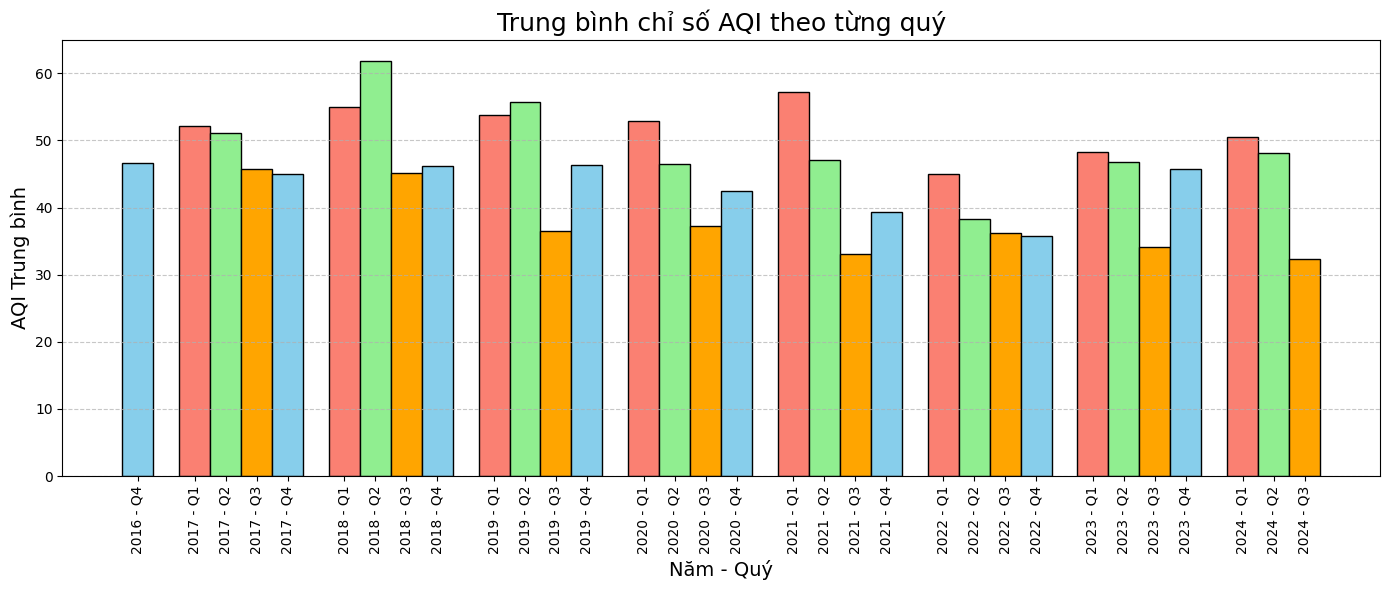

In [3]:

for_used_data = data[['date', 'aqi']]
for_used_data = pd.DataFrame(for_used_data)
for_used_data['date'] = pd.to_datetime(for_used_data['date'])
for_used_data.set_index('date', inplace=True)

quarterly_data = for_used_data.resample('Q').mean()
quarterly_data['Year'] = quarterly_data.index.year
quarterly_data['Quarter'] = quarterly_data.index.quarter

# Xác định nhãn cho từng giai đoạn-quý
x_labels = (quarterly_data['Year'].astype(str) + ' - Q' + quarterly_data['Quarter'].astype(str)).tolist()

# Định nghĩa màu cho từng quý
colors = {1: 'salmon', 2: 'lightgreen', 3: 'orange', 4: 'skyblue'}
color_list = [colors[q] for q in quarterly_data['Quarter']]

bar_width = 0.6 # Độ rộng các cột
spacing = 0.5  # Khoảng cách giữa các năm

unique_years = quarterly_data['Year'].unique()
x_positions = []
current_x = 0
values = []

# Tọa độ từng cột trên trục x
for year in unique_years:
    for q in range(1, 5):
        row = quarterly_data[(quarterly_data['Year'] == year) & (quarterly_data['Quarter'] == q)]
        if not row.empty:
            x_positions.append(current_x)
        current_x += bar_width  # Dịch vị trí x cho mỗi quý
    current_x += spacing  # Dịch xa hơn sau khi xong 1 năm

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.bar(x_positions, quarterly_data['aqi'], color=color_list, edgecolor='black', width=bar_width,)

# Tùy chỉnh biểu đồ
plt.xticks(x_positions, x_labels, rotation=90, fontsize=10)

plt.title('Trung bình chỉ số AQI theo từng quý', fontsize=18)
plt.xlabel('Năm - Quý', fontsize=14)
plt.ylabel('AQI Trung bình', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


## BIỂU ĐỒ ĐƯỜNG: BIỂU ĐỒ THỂ HIỆN SỰ THAY ĐỔI NỒNG ĐỘ  BỤI CÓ TRONG KHÔNG KHÍ THEO QUÝ TRONG GIAI ĐOẠN TỪ 2017-2023
1. **Các thuộc tính sử dụng**
- `date`: thời điểm ghi nhận số liệu.
- `pm2.5`: nồng độ bụi có đường kính 2.5 micromet trở xuống (đơn vị μg/m3)
2. **Loại biểu đồ**

   **Biểu đồ đường kết hợp**: là biểu đồ phù hợp cho trực quan hiệu quả sự biến đổi theo thời gian của nhiều đối tượng đồng chất, phù hợp cho việc theo dõi, đánh giá và quan sát xu hướng.

3. **Ý nghĩa của biểu đồ**

- Tên biểu đồ: Số ngày PM2.5 lớn hơn 40 theo tháng (2017-2023)
- Biểu đồ thực hiện việc trực quan số ngày của mỗi tháng ghi nhận được sự xuất hiện của nồng độ bụi pm2.5 trong không khí vượt mức 40 μg/m3 có xuất hiện tron ngày, việc quan sát thực hiện trong vòng 7 năm từ 2017-2023.
- Trục tung là số ngày không khí đạt mức cao với sự xuất hiện của bụi này.
- Trục hoành là thời gian quan sát.
- Các đường có màu khác nhau đại diện cho các năm khác nhau, các tháng thuộc cùng một năm sẽ được thể hiện cùng màu sắc.
- Có sự ngăn cách giữa các năm với nhau cho thuận tiện cho việc quan sát.

4. **Nguyên nhân sử dụng**

   Để trực quan tốt sự biến đổi và xu hướng tăng giảm của loại bụi này trong không khí theo thời gian thì biểu đồ đường là một lựa chọn hàng đầu. Đồng thời việc sử dụng nhiều màu sắc còn giúp tách biệt các tháng ra cho tiện quan sát.

5. **Kết luận**
- Nhìn chung tình trạng không khí của Shilin, Đài Loan đang có chuyển biến tích cực trong nhiều năm trở lại đây khi có sự suy giảm đáng kể của số ngày ghi nhận sự xuất hiện nồng độ cao của loại bụi này.
- Các tháng đầu năm luôn ghi nhận sự gia tăng mạnh về nồng độ của loại bụi này, giảm dần về giữa năm và rất hạn chế vào cuối năm.
- Tình trạng không khí Shilin được cải thiện rất tốt những năm gần đây khi có những tháng hầu như không có sự xuất hiện của những ngày đạt nồng độ vượt mức 40 μg/m3

C:\Users\vietl\AppData\Local\Temp\ipykernel_3736\2443622470.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(years))


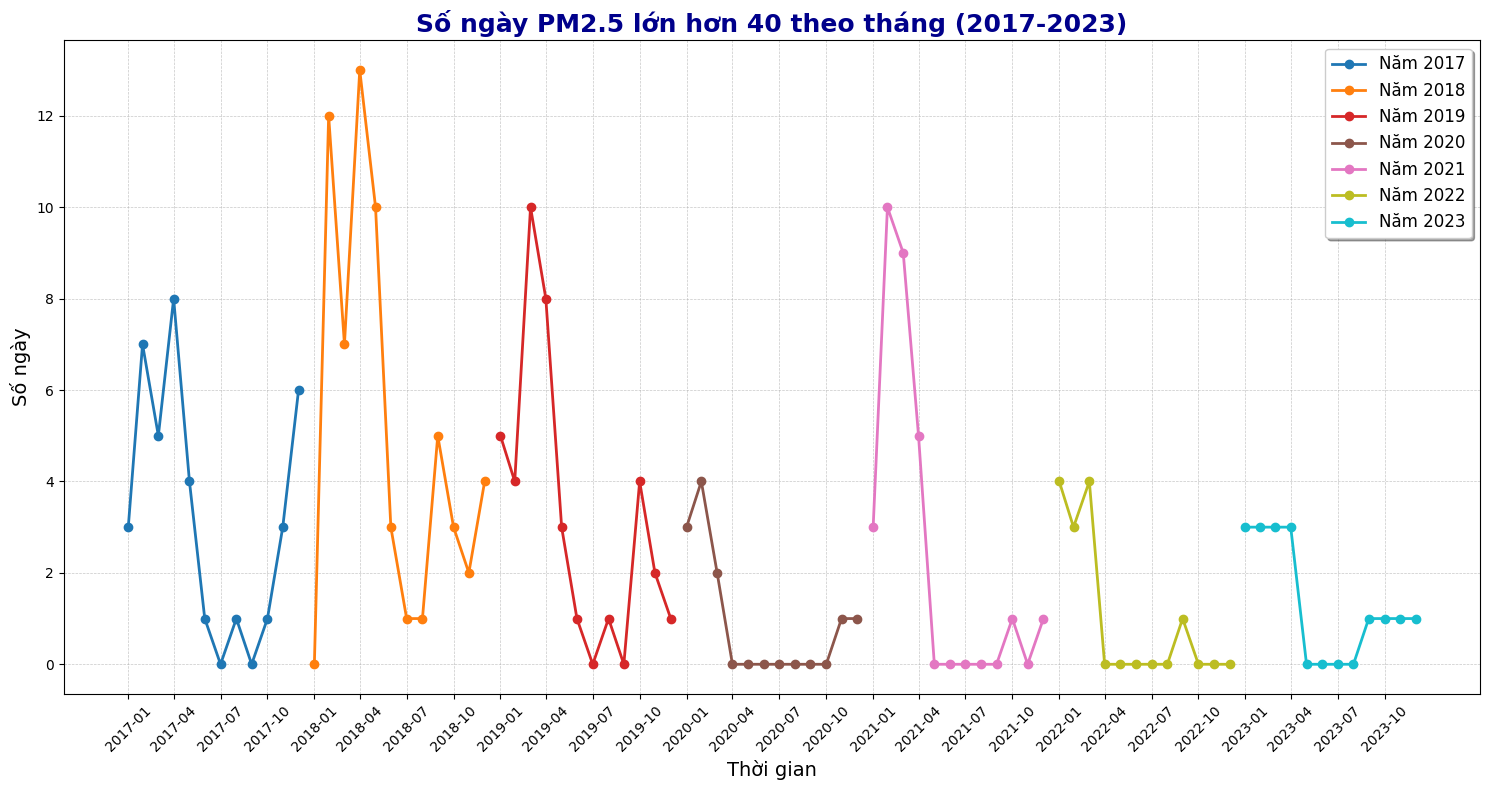

In [4]:
line_used_data = data[['date', 'pm2.5']].copy()
line_used_data['date'] = pd.to_datetime(line_used_data['date'])
line_used_data.set_index('date', inplace=True)


daily_data = line_used_data.resample('D').max()  
daily_data['pm2.5_over_40'] = daily_data['pm2.5'] > 40

monthly_data = daily_data.resample('ME')['pm2.5_over_40'].sum()

monthly_data = monthly_data.to_frame(name='days_over_40')
monthly_data['Year'] = monthly_data.index.year


filtered_data = monthly_data[(monthly_data['Year'] >= 2017) & (monthly_data['Year'] < 2024)]

years = filtered_data['Year'].unique()  
colors = cm.get_cmap('tab10', len(years))  

plt.figure(figsize=(15, 8))

# Vẽ từng năm với màu sắc riêng
for i, year in enumerate(years):
    yearly_data = filtered_data[filtered_data['Year'] == year]
    plt.plot(
        yearly_data.index, 
        yearly_data['days_over_40'], 
        marker='o', 
        linestyle='-', 
        markersize=6, 
        linewidth=2,
        color=colors(i), 
        label=f'Năm {year}'
    )


plt.title('Số ngày PM2.5 lớn hơn 40 theo tháng (2017-2023)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Thời gian', fontsize=14)
plt.ylabel('Số ngày', fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

plt.xticks(
    ticks=filtered_data.index[::3],  # Hiển thị nhãn 3 tháng/lần
    labels=[date.strftime('%Y-%m') for date in filtered_data.index[::3]],
    rotation=45,
    fontsize=10
)


plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## BIỂU ĐỒ NHIỆT: BIỂU ĐỒ THỂ HIỆN SỰ TƯƠNG QUAN GIỮA CHỈ SỐ AIR QUALITY INDEX VÀ CÁC KHÍ ĐỘC HẠI CÓ TRONG KHÔNG KHÍ
1. **Các thuộc tính sử dụng**
- `date`: thời điểm ghi nhận số liệu.
- `so2`: nồng độ khí SO2 có trong không khí (đơn vị ppb)
- `o3`: nồng độ khí O3 có trong không khí (đơn vị ppb)
- `pm10`: nồng độ bụi có đường kính 10 micromet trở xuống (đơn vị μg/m3)
- `pm2.5`: nồng độ bụi có đường kính 2.5 micromet trở xuống (đơn vị μg/m3)
- `no2`: nồng độ khí NO2 có trong không khí (đơn vị ppb)
- `no`: nồng độ khí NO có trong không khí (đơn vị ppb)
2. **Loại biểu đồ**

   **Biểu đồ nhiệt**: biểu đồ này giúp trực quan hóa ma trận tươn quan giữa các đối tượng được xét để xem sự ảnh hưởng của những đối tượng này lên nhau

3. **Ý nghĩa của biểu đồ**

- Tên biểu đồ: Sự tương quan giữa AQI và các chất khí khác
- Thanh dọc bên phải thể hiện mức độ tương quan giữa các đối tượng theo thang đo từ -1 đến 1, với 1 là tương quan 100%. Các tương quan dương tức tăng cùng tăng sẽ có gam màu nóng dần và ngược lại.

4. **Nguyên nhân sử dụng**

   Để nắm bắt được sự tương quan giữa các chất khí, muốn biết rõ xem liệu sự gia tăng của khí này ảnh hưởng như thế nào đến các khí còn lại thì biểu đồ nhiệt là công cụ rất phù hợp.

5. **Kết luận**

- Có thể thấy hầu hết các chất khí có sự tương quan ít nhiều lẫn nhau nhưng không đáng kể, sự gia tăng của chất khí này không kéo theo sự gia tăng của chất khí khác quá nhiều. Điều này chỉ thể hiện việc sinh hoạt hằng ngày thải ra nhiều hơn một loại khí.
- AQI tương quan rất mạnh mẽ với pm10(0.69) và pm2.5(0.78), điều này có thể đưa ra nhận định rằng chất lượng không khí bị ảnh hưởng rất nhiều bởi hai loại bụi này, việc gia tăng nồng độ của loại bụi này gây suy giảm mạnh mẽ chất lượng không khí (AQI tăng).
- Ngoài ra O3 tuy không ảnh hưởng trực tiếp đến sức khỏe con người nhưng cũng được coi là chất khí ảnh hưởng đến chất lượng không khí khi mà khí này là nguyên nhân chính gây nên hiệu ứng nhà kính.

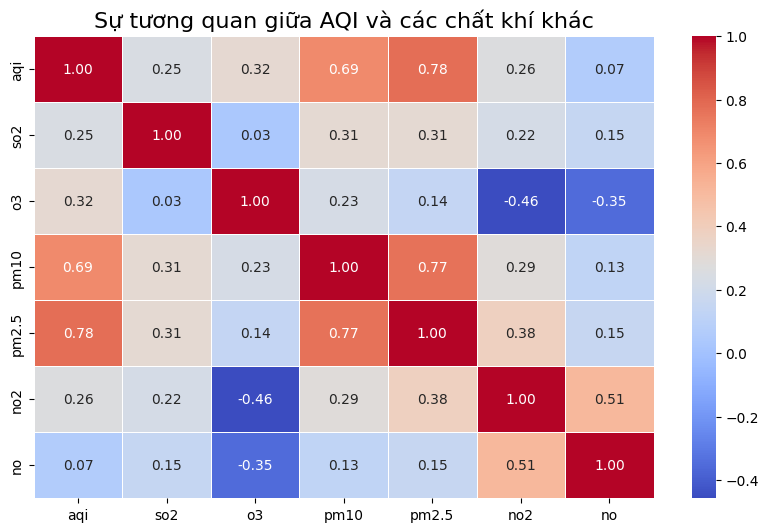

In [5]:
import seaborn as sns

# Tính ma trận tương quan giữa các cột
correlation_matrix = data[['aqi', 'so2', 'o3', 'pm10', 'pm2.5', 'no2','no']].corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sự tương quan giữa AQI và các chất khí khác', fontsize=16)
plt.show()